In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

%matplotlib inline

In [2]:
#http://stackoverflow.com/questions/36031338/interpolate-z-values-in-a-3d-surface-starting-from-an-irregular-set-of-points

class Estimation():
    def __init__(self,datax,datay,dataz):
        self.x = datax
        self.y = datay
        self.v = dataz

    def estimate(self,x,y,using='ISD'):
        """
        Estimate point at coordinate x,y based on the input data for this
        class.
        """
        if using == 'ISD':
            return self._isd(x,y)

    def _isd(self,x,y):
        d = np.sqrt((x-self.x)**2+(y-self.y)**2)
        if d.min() > 0:
            v = np.sum(self.v*(1/d**2)/np.sum(1/d**2))
            return v
        else:
            return self.v[d.argmin()]

In [3]:
auv = np.genfromtxt('/media/adam/data/is6_f11/lidar_auv_analysis/auv_subset.txt')

e = Estimation(auv[:,0],auv[:,1],auv[:,2])

In [4]:
gtdrills = np.genfromtxt('/media/adam/data/is6_f11/insitu/icethickness_not_transect.txt', 
                         usecols=(0,1,2,3,4,5), skip_header=1, delimiter=',')

In [5]:
z_from_auv = []
for hole in gtdrills:
    z_hole = e.estimate(hole[0], hole[1])
    z_from_auv.append(z_hole)

In [6]:
drill_draft = gtdrills[:,4]

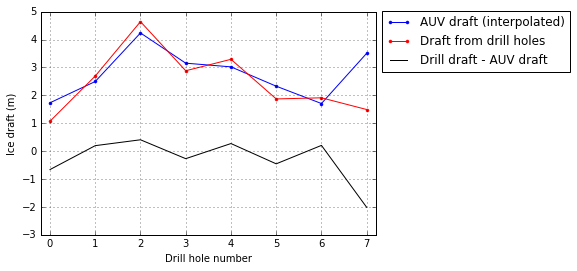

In [7]:
plt.plot(z_from_auv, 'b.-', label='AUV draft (interpolated)')
plt.plot(drill_draft, 'r.-', label='Draft from drill holes')
plt.plot(drill_draft - z_from_auv, 'k', label='Drill draft - AUV draft')
plt.xlim([-0.2, 7.2])
plt.legend(loc=2, bbox_to_anchor=(1,1.03))
plt.ylabel('Ice draft (m)')
plt.xlabel('Drill hole number')
plt.grid()

In [8]:
z_from_auv

[1.7316884858942696,
 2.4947404642882494,
 4.2343750734013907,
 3.1512523259855931,
 3.0193783002831407,
 2.3264010289339905,
 1.7053495216174472,
 3.5063074758496939]

In [21]:
lidar = np.genfromtxt('/media/adam/data/is6_f11/python_zi/is6_f11_pass1_aa522816_523019_c_zi.xyz',
                      usecols = (0,1,2,3,4,5,6,7,8), skip_header=1)
lidar = lidar[(lidar[:,1] >= -25) & (lidar[:,1] <= 125) & (lidar[:,2] >= -25) & (lidar[:,2] <= 125) ]

In [10]:
l = Estimation(lidar[:,1],lidar[:,2],lidar[:,3])

In [11]:
z_from_lidar = []
for hole in gtdrills:
    z_hole = l.estimate(hole[0], hole[1])
    z_from_lidar.append(z_hole)

In [12]:
drill_tf = gtdrills[:,2]+ gtdrills[:,5]

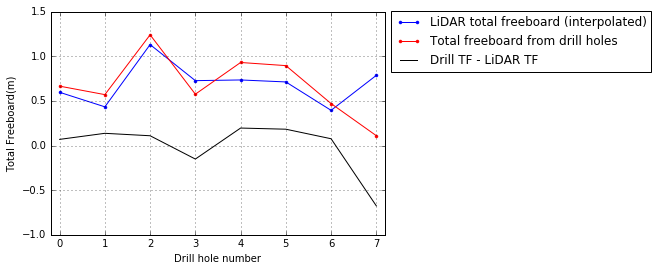

In [13]:
plt.plot(z_from_lidar, 'b.-', label='LiDAR total freeboard (interpolated)')
plt.plot(drill_tf, 'r.-', label='Total freeboard from drill holes')
plt.plot(drill_tf - z_from_lidar, 'k', label='Drill TF - LiDAR TF')
plt.xlim([-0.2, 7.2])
plt.legend(loc=2, bbox_to_anchor=(1,1.03))
plt.ylabel('Total Freeboard(m)')
plt.xlabel('Drill hole number')
plt.grid()

(-40.0, 140.0, -40.0, 140.0)

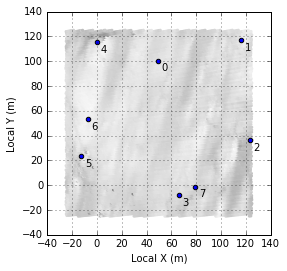

In [14]:
labels=np.arange(0,8,1)
cmap = plt.get_cmap('gray_r')

plt.scatter(lidar[:,1], lidar[:,2], c=lidar[:,3], cmap=cmap, lw=0, s=10, vmin=0, vmax=5)
plt.scatter(gtdrills[:,0], gtdrills[:,1])
plt.grid()
for label in labels:
    plt.text(gtdrills[label,0]+3, gtdrills[label,1]-8, str(label))

plt.xlabel('Local X (m)')
plt.ylabel('Local Y (m)')
plt.axis('scaled')

In [15]:
photo = np.genfromtxt('/media/adam/data/is6_f11/photoscan/is6_f11_photoscan_aggr.pts', usecols = (0,1,2), skip_header=1)
photo = photo[(photo[:,0] >= -25) & (photo[:,0] <= 125) & (photo[:,1] >= -25) & (photo[:,1] <= 125) ]
ep = Estimation(photo[:,0],photo[:,1],photo[:,2]+0.614)

In [16]:
z_from_photo = []
for hole in gtdrills[::-1]:
    z_hole = ep.estimate(hole[0], hole[1])
    z_from_photo.append(z_hole)

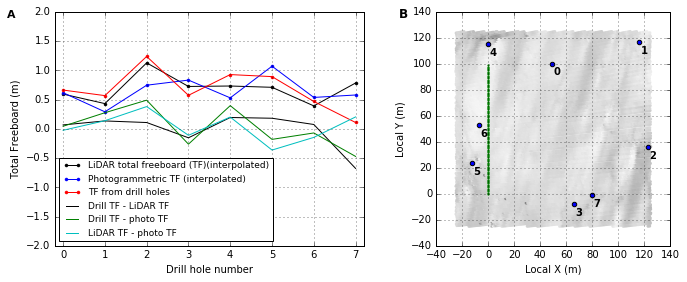

In [17]:
d_l = drill_tf - z_from_lidar
d_p = drill_tf - z_from_photo

t_y = np.arange(0,100,1)
t_x = np.zeros_like(t_y)

fig = plt.figure()
fig.set_size_inches(25/2.51, 10/2.51)

ax0 =fig.add_subplot(1,2,1)

ax0.plot(z_from_lidar, 'k.-', label='LiDAR total freeboard (TF)(interpolated)')
ax0.plot(z_from_photo, 'b.-', label='Photogrammetric TF (interpolated)')
ax0.plot(drill_tf, 'r.-', label='TF from drill holes')
ax0.plot(d_l, 'k', label='Drill TF - LiDAR TF')
ax0.plot(d_p, 'g', label='Drill TF - photo TF')
ax0.plot(np.array(z_from_lidar) - z_from_photo, 'c', label='LiDAR TF - photo TF')
ax0.set_xlim([-0.2, 7.2])
ax0.set_ylim([-2, 2])
ax0.text(-0.14, 0.99,'A', ha='center', va='center', transform=ax0.transAxes, fontsize=11, weight='bold')


#ax0.legend(loc=2, bbox_to_anchor=(1,1.03), fontsize=9)
ax0.legend(loc=0,fontsize=9)
ax0.set_ylabel('Total Freeboard (m)')
ax0.set_xlabel('Drill hole number')
ax0.grid()

ax1 = fig.add_subplot(1,2,2)
ax1.scatter(lidar[:,1], lidar[:,2], c=lidar[:,3], cmap=cmap, lw=0, s=10, vmin=0, vmax=5)
ax1.scatter(t_x, t_y, c='g', lw=0, s=5)
ax1.scatter(gtdrills[:,0], gtdrills[:,1])
ax1.grid()
for label in labels:
    ax1.text(gtdrills[label,0]+1, gtdrills[label,1]-9, str(label),  weight='bold', fontsize=10)
ax1.set_xlabel('Local X (m)')
ax1.set_ylabel('Local Y (m)')
ax1.axis('scaled')
ax1.text(-0.14, 0.99,'B', ha='center', va='center', transform=ax1.transAxes, fontsize=12, weight='bold')
plt.tight_layout()

plt.savefig('ch4_dist_holes_fbcomp.pdf',  bbox_inches='tight')

In [18]:
d_l

array([ 0.06882135,  0.13669828,  0.10945737, -0.15163188,  0.19562148,
        0.18278851,  0.0759443 , -0.67607109])

In [19]:
d_p

array([ 0.04529048,  0.27723438,  0.49198432, -0.26064585,  0.39848222,
       -0.17862906, -0.06896624, -0.47064293])

In [25]:
e_ld = Estimation(lidar[:,1],lidar[:,2],lidar[:,7])

In [30]:
d_from_lidar = []
for hole in gtdrills:
    d_hole = e_ld.estimate(hole[0], hole[1])
    d_from_lidar.append(-d_hole)

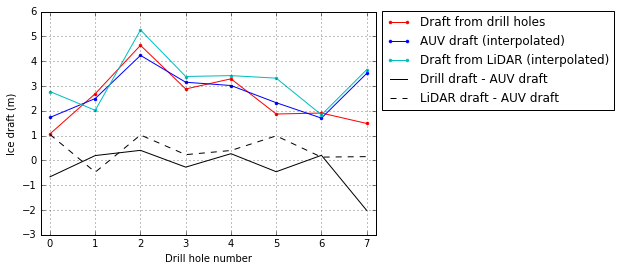

In [45]:
plt.plot(drill_draft, 'r.-', label='Draft from drill holes')
plt.plot(z_from_auv, 'b.-', label='AUV draft (interpolated)')
plt.plot(d_from_lidar, 'c.-', label='Draft from LiDAR (interpolated)')

plt.plot(drill_draft - z_from_auv, 'k', label='Drill draft - AUV draft')
plt.plot(np.array(d_from_lidar) - z_from_auv, 'k--', label='LiDAR draft - AUV draft')

plt.xlim([-0.2, 7.2])
plt.legend(loc=2, bbox_to_anchor=(1,1.03))
plt.ylabel('Ice draft (m)')
plt.xlabel('Drill hole number')
plt.grid()

plt.savefig('dist_drillholes_lidar_auv_draft.pdf', bbox_inches='tight')
plt.savefig('dist_drillholes_lidar_auv_draft.png', bbox_inches='tight')

In [40]:
print('difference between drill hole and AUV draft: {}, sd: {}'.format(np.mean(drill_draft - z_from_auv),
                                                                       np.std(drill_draft - z_from_auv)))

difference between drill hole and AUV draft: -0.29118658453172197, sd: 0.7436956691946783


In [43]:
plt.plot(d_table_s1[:,0], auv_mean, label='Mean AUV draft')

idx_s1 = np.argwhere(np.isclose(auv_mean,mean_draft_s1, atol=0.003)).reshape(-1)
idx_s1 = ids_s1[0]
plt.plot(densities[idx_s1], mean_draft_s1[idx_s1], 'ro')

plt.text(densities[idx_s1]+1,mean_draft_s1[idx_s1]-0.2, str(densities[idx_s1]))

plt.ylabel('Draft (m)')
plt.xlabel('Ice density (kg/m^3)')
plt.grid()
plt.legend(loc=0)
plt.title('Ice draft varying with density, SIPEX snow model')

difference between liDAR and AUV draft: 0.43776495247254527, sd: 0.5086609929734512


In [44]:
print('difference between drill hole and LiDAR draft: {}, sd: {}'.format(np.mean(drill_draft - np.array(d_from_lidar)),
                                                                  np.std(drill_draft - np.array(d_from_lidar))))

difference between drill hole and LiDAR draft: -0.7289515370042672, sd: 0.9060097736063747
